PracticaDL_Beatriz_Velayos - Pipeline Completo con Early Stopping
 -------------------------------------------------------------
 Listo para Google Colab / Jupyter / local

In [1]:
!pip install -q pandas numpy torch torchvision scikit-learn matplotlib seaborn Pillow tqdm

In [2]:
# 1. Instalación

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 2. Análisis Exploratorio de Datos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
csv_path = '/content/drive/MyDrive/DeepLearning/DeepLearning-main/Proyecto/poi_dataset.csv'
df = pd.read_csv(csv_path)

# Vista general del dataset
display(df.T)
display(df.head())
display(df.info())
display(df.describe(include='all'))

,0,1,2,3,4,5,6,7,8,9,...,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568
id,4b36a3ed-3b28-4bc7-b975-1d48b586db03,e32b3603-a94f-49df-8b31-92445a86377c,0123a69b-13ac-4b65-a5d5-71a95560cff5,390d7d9e-e972-451c-b5e4-f494af15e788,023fc1bf-a1cd-4b9f-af78-48792ab1a294,bcd58127-76bd-44e7-84d8-cc25b46c7962,f45b1b38-36cd-4479-bac1-544ca6b1e685,ca8d89fa-3e9e-4639-ac01-7f83c5d0130e,0089bb20-c132-496c-b215-1986fcfa9d4b,297257de-a00a-4e99-bd21-b3a2c529e916,...,c5c29bd8-c3bc-4405-82ed-7d17d89238ae,4f0f97a5-aa50-4f27-b26c-72909626fb7a,2f3f2208-0682-4ebb-98be-79155ea07783,2d399e39-055a-4469-b2ef-06cfa4345560,6722f309-c1e8-446a-bcec-ff4d8b448923,a1058fc5-8b4e-43db-8758-2a4197eb69ca,77df8476-484e-436e-8977-f957f6b9371a,21c741f5-cbe7-4ae0-a69d-b5c1622056af,4b8b38fa-78b5-4ea8-a676-1de4e2b48caa,d7f45b8d-c311-4309-a85a-d91f1fcd3b2f
name,Galería Fran Reus,Convento de San Plácido,Instituto Geológico y Minero de España,Margarita Gil Roësset,Museo del Traje. Centro de Investigación del P...,Clara Campoamor,Plaza de la Encarnación,Atentado en 1985,Cuesta de los ciegos,Fragmento de la muralla árabe de Madrid,...,Sin datos,Portada,Asilo de nombres usados,"Curiosidades, datos y pormenores de la villa d...",El viaducto,"Plaza de Puerta Cerrada, en Madrid",¡Aquel Madrid!,El viento se acuesta al atardecer,Edificio Metrópolis por Herreros,Monasterio de Moreruela
shortDescription,La Galería Fran Reus es un espacio dedicado a ...,"El Convento de San Plácido en Madrid, fundado ...","El Instituto Geológico y Minero de España, sit...","Margarita Gil Roësset, escultora y poetisa esp...","El Museo del Traje de Madrid, fundado en 2004,...","Clara Campoamor fue una abogada, escritora y p...",Debe su nombre al desaparecido convento de la ...,1985. ETA asesina en Madrid al coronel auditor...,La Cuesta de los Ciegos es una escalera empedr...,Este vestigio de la muralla árabe del siglo IX...,...,"BARAHONA (José Barahona Marco)\nSin datos, ca....","JOSÉ MARÍA PICÓ LÓPEZ\nPortada\nABC, núm. 13.9...",JUAN ESPLANDIÚ PEÑA\nAsilo de nombres usados\n...,"JUAN ESPLANDIÚ PEÑA\nCuriosidades, datos y por...",JOSÉ FRANCISCO AGUIRRE PÉREZ\nEl viaducto\nBla...,"ANTONIO ORBEGOZO\nPlaza de Puerta Cerrada, en ...","JUAN ESPLANDIÚ PEÑA\n¡Aquel Madrid!\nABC, núm....",SERNY (Ricardo Summers e Isern)\nEl viento se ...,HERREROS (Enrique García-Herreros Codesido)\nS...,"Descubre el Monasterio de Moreruela, una joya ..."
categories,"['Escultura', 'Pintura']","['Patrimonio', 'Historia']","['Ciencia', 'Patrimonio']",['Cultura'],"['Patrimonio', 'Cultura']","['Historia', 'Cultura']","['Historia', 'Arquitectura']",['Historia'],"['Arquitectura', 'Historia']","['Arquitectura', 'Patrimonio']",...,['Pintura'],['Pintura'],['Pintura'],['Pintura'],['Pintura'],['Pintura'],['Pintura'],['Pintura'],['Pintura'],"['Patrimonio', 'Historia', 'Arquitectura']"
tier,1,1,2,1,1,1,2,3,3,2,...,1,1,1,1,1,1,1,1,1,1
locationLon,2.642262,-3.704467,-3.699694,-3.691228,-3.727822,-3.690211,-5.992007,-3.677161,-3.714567,-3.714546,...,-3.688483,-3.703395,-3.690199,-3.704049,-3.715019,-3.707943,-3.68912,-3.712121,-3.695836,-5.7776
locationLat,39.572694,40.423037,40.442045,40.427256,40.439665,40.435082,37.392953,40.4358,40.412984,40.414866,...,40.420718,40.417073,40.409594,40.417024,40.413979,40.413677,40.416555,40.419088,40.418698,41.812321
tags,[],[],[],[],[],[],[],[],[],[],...,"['Constructivismo', 'cartel']","['Nochevieja', 'ABC', 'Periodismo', 'portada']","['César González-Ruano', 'Juan Esplandiú Peña'...",['Puerta del sol'],"['Viaducto', 'Puente']",['Cruz'],"['Puerta', 'Parque del Retiro']","['Estatuas', 'Plaza']","['Alcalá', 'Gran Vía', 'Metrópolis']","['Arquitectura', 'Cisterciense', 'Císter', 'Mo..."
xps,500,500,250,500,500,500,250,100,150,250,...,600,600,600,600,600,600,600,600,600,500
Visits,10009,10010,10015,10011,10020,10019,10013,10019,10007,10018,...,10009,10010,10009,10012,10005,10014,10013,10005,10006,10011


,id,name,shortDescription,categories,tier,locationLon,locationLat,tags,xps,Visits,Likes,Dislikes,Bookmarks,main_image_path
0,4b36a3ed-3b28-4bc7-b975-1d48b586db03,Galería Fran Reus,La Galería Fran Reus es un espacio dedicado a ...,"['Escultura', 'Pintura']",1,2.642262,39.572694,[],500,10009,422,3582,78,data_main/4b36a3ed-3b28-4bc7-b975-1d48b586db03...
1,e32b3603-a94f-49df-8b31-92445a86377c,Convento de San Plácido,"El Convento de San Plácido en Madrid, fundado ...","['Patrimonio', 'Historia']",1,-3.704467,40.423037,[],500,10010,7743,96,2786,data_main/e32b3603-a94f-49df-8b31-92445a86377c...
2,0123a69b-13ac-4b65-a5d5-71a95560cff5,Instituto Geológico y Minero de España,"El Instituto Geológico y Minero de España, sit...","['Ciencia', 'Patrimonio']",2,-3.699694,40.442045,[],250,10015,3154,874,595,data_main/0123a69b-13ac-4b65-a5d5-71a95560cff5...
3,390d7d9e-e972-451c-b5e4-f494af15e788,Margarita Gil Roësset,"Margarita Gil Roësset, escultora y poetisa esp...",['Cultura'],1,-3.691228,40.427256,[],500,10011,8559,79,2358,data_main/390d7d9e-e972-451c-b5e4-f494af15e788...
4,023fc1bf-a1cd-4b9f-af78-48792ab1a294,Museo del Traje. Centro de Investigación del P...,"El Museo del Traje de Madrid, fundado en 2004,...","['Patrimonio', 'Cultura']",1,-3.727822,40.439665,[],500,10020,915,2896,143,data_main/023fc1bf-a1cd-4b9f-af78-48792ab1a294...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1569 non-null   object 
 1   name              1569 non-null   object 
 2   shortDescription  1569 non-null   object 
 3   categories        1569 non-null   object 
 4   tier              1569 non-null   int64  
 5   locationLon       1569 non-null   float64
 6   locationLat       1569 non-null   float64
 7   tags              1569 non-null   object 
 8   xps               1569 non-null   int64  
 9   Visits            1569 non-null   int64  
 10  Likes             1569 non-null   int64  
 11  Dislikes          1569 non-null   int64  
 12  Bookmarks         1569 non-null   int64  
 13  main_image_path   1569 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 171.7+ KB


None

,id,name,shortDescription,categories,tier,locationLon,locationLat,tags,xps,Visits,Likes,Dislikes,Bookmarks,main_image_path
count,1569,1569,1569,1569,1569.000000,1569.000000,1569.000000,1569,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569
unique,1492,1458,1491,224,NaN,NaN,NaN,1418,NaN,NaN,NaN,NaN,NaN,1492
top,a0f3f39c-fc87-4031-900d-d4776b1f3491,Ambresbury Banks en el bosque de Epping,"Explora Ambresbury Banks en Epping Forest, un ...","['Patrimonio', 'Historia', 'Arquitectura']",NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,data_main/a0f3f39c-fc87-4031-900d-d4776b1f3491...
freq,7,7,7,100,NaN,NaN,NaN,107,NaN,NaN,NaN,NaN,NaN,7
mean,NaN,NaN,NaN,NaN,1.541109,-1.132337,39.900141,NaN,750.382409,10011.943276,3623.908222,2526.305927,973.261950,NaN
std,NaN,NaN,NaN,NaN,0.637677,22.733401,9.662134,NaN,228.319854,5.456808,4817.879374,2225.543360,1453.333948,NaN
min,NaN,NaN,NaN,NaN,1.000000,-121.951049,-62.940930,NaN,0.000000,10001.000000,100.000000,52.000000,50.000000,NaN
25%,NaN,NaN,NaN,NaN,1.000000,-3.725292,40.411754,NaN,600.000000,10008.000000,464.000000,937.000000,116.000000,NaN
50%,NaN,NaN,NaN,NaN,1.000000,-3.699140,40.421738,NaN,700.000000,10011.000000,1434.000000,2718.000000,306.000000,NaN
75%,NaN,NaN,NaN,NaN,2.000000,-3.673348,40.472458,NaN,1000.000000,10015.000000,6840.000000,3399.000000,1309.000000,NaN


In [4]:
# 3. Imports
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from tqdm import tqdm

In [5]:
# 4. Configuración
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

Device: cuda


In [6]:
# 5. Carga de datos
csv_path = '/content/drive/MyDrive/DeepLearning/DeepLearning-main/Proyecto/poi_dataset.csv'
df = pd.read_csv(csv_path)

In [7]:
# 6. Limpieza básica y preparación de categorías
def parse_categories(val):
    if isinstance(val, list): return val
    if isinstance(val, str):
        try: return eval(val)
        except: return []
    return []
df['categories_clean'] = df['categories'].apply(parse_categories)
df['main_category'] = df['categories_clean'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')

le_cat = LabelEncoder()
df['categories_enc'] = le_cat.fit_transform(df['main_category'])

mlb = MultiLabelBinarizer()
mlb.fit(df['categories_clean'])
cat_df = pd.DataFrame(mlb.transform(df['categories_clean']), columns=[f'cat_{c}' for c in mlb.classes_])
df = pd.concat([df, cat_df], axis=1)

In [8]:
# 7. Outlier removal (IQR) y tratamiento de numéricos
num_cols = ['tier', 'xps', 'Visits', 'Likes', 'Dislikes', 'Bookmarks', 'locationLon', 'locationLat']
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    df = df[(df[col] >= lower) & (df[col] <= upper)]

df = df.reset_index(drop=True)

In [9]:
# 8. Preparar rutas de imágenes
def get_image_path(x):
    if pd.isnull(x): return None
    return os.path.join(os.path.dirname(csv_path), x)
df['image_path'] = df['main_image_path'].apply(get_image_path)
df = df[df['image_path'].notnull()].reset_index(drop=True)

In [10]:
# 9. División Train/Test y reindexado
vc = df['categories_enc'].value_counts()
to_keep = vc[vc > 1].index
df = df[df['categories_enc'].isin(to_keep)].reset_index(drop=True)
train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=SEED, stratify=df['categories_enc'])

le = LabelEncoder()
train_df['categories_enc'] = le.fit_transform(train_df['categories_enc'])
test_df['categories_enc'] = le.transform(test_df['categories_enc'])

In [11]:
# 10. Imputación de nulos y escalado
for col in num_cols:
    mean_train = train_df[col].mean()
    train_df[col] = train_df[col].fillna(mean_train)
    test_df[col]  = test_df[col].fillna(mean_train)

scaler = StandardScaler()
scaler.fit(train_df[num_cols])
train_df[num_cols] = scaler.transform(train_df[num_cols])
test_df[num_cols]  = scaler.transform(test_df[num_cols])

In [12]:
# 11. Columnas finales de metadatos
metadata_cols = num_cols + [f'cat_{c}' for c in mlb.classes_]
label_col = 'categories_enc'

In [13]:
# 12. Dataset personalizado
class POIDataset(Dataset):
    def __init__(self, df, metadata_cols, label_col, transform=None):
        self.df = df
        self.metadata = df[metadata_cols].values.astype(np.float32)
        self.labels = df[label_col].values
        self.image_paths = df['image_path'].values
        self.transform = transform
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        meta = torch.tensor(self.metadata[idx])
        label = torch.tensor(self.labels[idx]).long()
        return image, meta, label

In [14]:
# 13. Transformaciones de imagen
IMG_SIZE = 224
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor()
])

In [15]:
# 14. Datasets y dataloaders
train_dataset = POIDataset(train_df, metadata_cols, label_col, transform=train_transform)
test_dataset  = POIDataset(test_df, metadata_cols, label_col, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_dataset,  batch_size=32, shuffle=False, num_workers=2)

In [16]:
# 15. Modelo híbrido (ResNet18 + metadatos)
import torchvision.models as models
import torch.nn as nn

class HybridModel(nn.Module):
    def __init__(self, n_meta_features, n_classes):
        super().__init__()
        self.cnn = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        self.cnn.fc = nn.Identity()
        self.meta = nn.Sequential(
            nn.Linear(n_meta_features, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
        )
        self.fc = nn.Sequential(
            nn.Linear(512 + 64, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, n_classes)
        )
    def forward(self, img, meta):
        img_feats = self.cnn(img)
        meta_feats = self.meta(meta)
        x = torch.cat([img_feats, meta_feats], dim=1)
        out = self.fc(x)
        return out

n_classes = train_df[label_col].nunique()
model = HybridModel(len(metadata_cols), n_classes).to(device)

In [17]:
# 16. Entrenamiento con Early Stopping
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
n_epochs = 20

best_val_loss = float('inf')
patience = 5
patience_counter = 0
best_model_state = None

for epoch in range(n_epochs):
    model.train()
    train_losses = []
    train_preds, train_labels = [], []
    for imgs, metas, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{n_epochs} - Train'):
        imgs, metas, labels = imgs.to(device), metas.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs, metas)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        train_preds.extend(torch.argmax(outputs, 1).cpu().numpy())
        train_labels.extend(labels.cpu().numpy())
    train_loss = np.mean(train_losses)
    train_acc = accuracy_score(train_labels, train_preds)
    train_f1 = f1_score(train_labels, train_preds, average='macro')

    # Validación
    model.eval()
    val_losses = []
    val_preds, val_labels = [], []
    with torch.no_grad():
        for imgs, metas, labels in tqdm(test_loader, desc='Val'):
            imgs, metas, labels = imgs.to(device), metas.to(device), labels.to(device)
            outputs = model(imgs, metas)
            loss = criterion(outputs, labels)
            val_losses.append(loss.item())
            val_preds.extend(torch.argmax(outputs, 1).cpu().numpy())
            val_labels.extend(labels.cpu().numpy())
    val_loss = np.mean(val_losses)
    val_acc = accuracy_score(val_labels, val_preds)
    val_f1 = f1_score(val_labels, val_preds, average='macro')

    print(f"Epoch {epoch+1}/{n_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.3f} | Train F1: {train_f1:.3f}")
    print(f"                    | Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.3f} | Val   F1: {val_f1:.3f}")

    # Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_state = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping en epoch {epoch+1}")
            break

Val: 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]


Epoch 1/20 | Train Loss: 2.1652 | Train Acc: 0.225 | Train F1: 0.075
                    | Val   Loss: 2.0002 | Val   Acc: 0.283 | Val   F1: 0.073


Val: 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]


Epoch 2/20 | Train Loss: 1.7430 | Train Acc: 0.372 | Train F1: 0.114
                    | Val   Loss: 1.7761 | Val   Acc: 0.362 | Val   F1: 0.090


Val: 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]


Epoch 3/20 | Train Loss: 1.5567 | Train Acc: 0.411 | Train F1: 0.131
                    | Val   Loss: 1.7003 | Val   Acc: 0.339 | Val   F1: 0.093


Val: 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]


Epoch 4/20 | Train Loss: 1.4051 | Train Acc: 0.500 | Train F1: 0.185
                    | Val   Loss: 1.6783 | Val   Acc: 0.354 | Val   F1: 0.122


Val: 100%|██████████| 4/4 [00:00<00:00,  6.89it/s]


Epoch 5/20 | Train Loss: 1.1913 | Train Acc: 0.628 | Train F1: 0.263
                    | Val   Loss: 1.6774 | Val   Acc: 0.378 | Val   F1: 0.147


Val: 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]


Epoch 6/20 | Train Loss: 1.0085 | Train Acc: 0.672 | Train F1: 0.286
                    | Val   Loss: 1.7493 | Val   Acc: 0.331 | Val   F1: 0.133


Val: 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]


Epoch 7/20 | Train Loss: 0.7900 | Train Acc: 0.794 | Train F1: 0.357
                    | Val   Loss: 1.7283 | Val   Acc: 0.425 | Val   F1: 0.149


Val: 100%|██████████| 4/4 [00:00<00:00,  6.89it/s]


Epoch 8/20 | Train Loss: 0.5830 | Train Acc: 0.868 | Train F1: 0.393
                    | Val   Loss: 1.9096 | Val   Acc: 0.354 | Val   F1: 0.155


Val: 100%|██████████| 4/4 [00:00<00:00,  6.71it/s]


Epoch 9/20 | Train Loss: 0.5019 | Train Acc: 0.879 | Train F1: 0.406
                    | Val   Loss: 2.0000 | Val   Acc: 0.370 | Val   F1: 0.162


Val: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]

Epoch 10/20 | Train Loss: 0.3909 | Train Acc: 0.891 | Train F1: 0.408
                    | Val   Loss: 1.9764 | Val   Acc: 0.362 | Val   F1: 0.169
Early stopping en epoch 10



*   Resumen de los resultados:


    -Rápida mejora inicial:

        El modelo aprende rápido en las primeras 5-7 épocas.

        La accuracy en train sube de 0.22 → 0.89 y la F1 de 0.075 → 0.408.

        La loss de entrenamiento baja fuertemente (de 2.16 → 0.39).

    -Validación se estanca:

        La accuracy en validación sube ligeramente (de 0.28 → 0.42), pero no acompaña a la de entrenamiento.

        El F1 en validación sube muy poco (de 0.07 → 0.16).

        La loss de validación apenas mejora e incluso empeora a partir de la epoch 5-6 (de 2.00 → 1.97–2.00).

        El Early stopping actúa pronto (epoch 10).


*   ¿Qué significa esto?: aprendizaje rápido pero con overfitting claro

    -El modelo es capaz de memorizar rápidamente el conjunto de entrenamiento (overfitting).

    -No generaliza bien a los datos de validación (gap grande entre train y val, tanto en accuracy como F1).

    -A partir de la epoch 5–6, la loss de validación deja de mejorar (incluso empeora), típico de overfitting.

    -F1 bajo y casi plano en validación: el modelo no está aprendiendo patrones generalizables.


*   ¿Por qué ocurre?:

    -Modelo demasiado complejo para el tamaño de datos (pocas muestras y muchas clases o parámetros).

    -Poca regularización: sin dropout, batchnorm, augmentación, etc.

    -Clases desbalanceadas: si tienes clases con pocos ejemplos, el F1 será bajo.

    -Cantidad de datos insuficiente.


In [18]:
# Restaurar mejor modelo
if best_model_state is not None:
    model.load_state_dict(best_model_state)


Evaluación final en test:
              precision    recall  f1-score   support

Arquitectura     0.2105    0.2667    0.2353        15
     Ciencia     0.0000    0.0000    0.0000         2
        Cine     0.0000    0.0000    0.0000         1
     Cultura     0.3913    0.4615    0.4235        39
   Escultura     0.3077    0.2857    0.2963        14
 Gastronomía     0.0000    0.0000    0.0000         1
    Historia     0.2778    0.2632    0.2703        19
  Naturaleza     0.0000    0.0000    0.0000         1
        Ocio     0.4839    0.4545    0.4688        33
  Patrimonio     0.0000    0.0000    0.0000         2

    accuracy                         0.3622       127
   macro avg     0.1671    0.1732    0.1694       127
weighted avg     0.3462    0.3622    0.3527       127



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


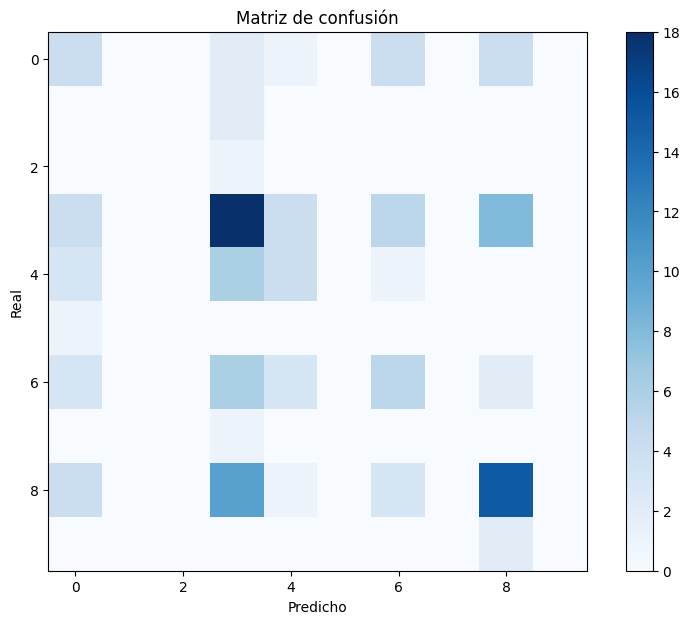

In [19]:
# 17. Evaluación en conjunto de test
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for imgs, metas, labels in test_loader:
        imgs, metas = imgs.to(device), metas.to(device)
        outputs = model(imgs, metas)
        preds = torch.argmax(outputs, 1).cpu().numpy()
        y_pred.extend(preds)
        y_true.extend(labels.numpy())

print("\nEvaluación final en test:")
print(classification_report(y_true, y_pred, target_names=le_cat.inverse_transform(np.unique(y_true)), digits=4))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,7))
plt.imshow(cm, cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.colorbar()
plt.show()

    Análisis general:

        -Accuracy global: 0.36
        → El modelo acierta aproximadamente 1 de cada 3 ejemplos en el test, un rendimiento bajo pero coherente con los resultados de validación vistos durante el entrenamiento.

        -Macro avg F1: 0.17
        → El promedio entre clases es muy bajo: el modelo no está capturando bien las distintas categorías y falla sobre todo en las clases minoritarias.

        -Weighted avg F1: 0.35
        → También bajo, aunque refleja un poco mejor el comportamiento sobre las clases más frecuentes (por su mayor peso en el total).

    Análisis por clase:

Clase	Precision	Recall	F1	Soporte
Arquitectura	0.21	0.27	0.24	15
Ciencia	0.00	0.00	0.00	2
Cine	0.00	0.00	0.00	1
Cultura	0.39	0.46	0.42	39
Escultura	0.31	0.29	0.30	14
Gastronomía	0.00	0.00	0.00	1
Historia	0.28	0.26	0.27	19
Naturaleza	0.00	0.00	0.00	1
Ocio	0.48	0.45	0.47	33
Patrimonio	0.00	0.00	0.00	2

    -Clases frecuentes (“Cultura”, “Ocio”, “Escultura”, “Historia”):
    F1 entre 0.24 y 0.47: rendimiento modesto pero significativamente mejor que el azar. El modelo muestra cierta capacidad para reconocer estas categorías, especialmente “Ocio” y “Cultura”.

    -Clases minoritarias (“Ciencia”, “Cine”, “Gastronomía”, “Naturaleza”, “Patrimonio”):
    F1 = 0.00, Precision = 0.00, Recall = 0.00.
    El modelo no acierta ningún ejemplo de estas clases. Esto suele ocurrir cuando hay muy pocos ejemplos de una clase y el modelo no aprende nada relevante sobre ellas.

    -Además, sklearn avisa: “Precision is ill-defined…” porque hay clases sin ninguna predicción, algo habitual en problemas con clases desbalanceadas.

In [22]:
# 18. Interpretación práctica
print("""
Interpretación práctica: ¿Qué implican estos resultados para el problema de engagement?:

- El modelo muestra un rendimiento global bajo (accuracy 0.36, F1 ponderado 0.35).
Para recomendar o clasificar POIs por su categoría principal, sería poco útil para las clases minoritarias:
estos POIs nunca se reconocen, lo que supone un riesgo de dejar fuera recomendaciones relevantes o estratégicas,
especialmente en categorías con pocos ejemplos.

- Para las clases frecuentes (“Ocio”, “Cultura”, “Escultura”, “Historia”), el modelo tiene cierta capacidad para diferenciarlas,
pero el rendimiento sigue siendo modesto (F1 entre 0.24 y 0.47). Por tanto, el modelo puede aportar valor solo como ayuda complementaria,
pero está lejos de ser fiable como sistema de clasificación automática.""")



Interpretación práctica: ¿Qué implican estos resultados para el problema de engagement?:

- El modelo muestra un rendimiento global bajo (accuracy 0.36, F1 ponderado 0.35). 
Para recomendar o clasificar POIs por su categoría principal, sería poco útil para las clases minoritarias: 
estos POIs nunca se reconocen, lo que supone un riesgo de dejar fuera recomendaciones relevantes o estratégicas, 
especialmente en categorías con pocos ejemplos.

- Para las clases frecuentes (“Ocio”, “Cultura”, “Escultura”, “Historia”), el modelo tiene cierta capacidad para diferenciarlas, 
pero el rendimiento sigue siendo modesto (F1 entre 0.24 y 0.47). Por tanto, el modelo puede aportar valor solo como ayuda complementaria, 
pero está lejos de ser fiable como sistema de clasificación automática.
